In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline


In [61]:
raw_data = pd.read_csv('ESSdata_Thinkful.csv.txt')
raw_data.dropna(inplace=True)
raw_data.head()


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [ ]:
# In this dataset, the same participants answered questions in 2012 and again 2014.

# Did people become less trusting from 2012 to 2014?    No, but not Signficant Change

# Compute results for each country in the sample.
# Did people become happier from 2012 to 2014?   No, but not Signficant Change

# Compute results for each country in the sample.
# Who reported watching more TV in 2012, men or women?  Women, but not a significant difference

# Who was more likely to believe people were fair in 2012, 
# people living with a partner or people living alone?   People with a partner believed 
#people are more fair

# Pick three or four of the countries in the sample and 
# compare how often people met socially in 2014. Are there differences, 
# and if so, which countries stand out?    Significant Difference.  Sweden has highest.

# Pick three or four of the countries in the sample 
# and compare how often people took part in social activities, 
# relative to others their age, in 2014. Are there differences, 
# and if so, which countries stand out?    
#Significant Differences in Over 60 (Sweden has highest) and Under 24 (Czech has highest)

Mean Increase in Trust from 2012 to 2014: -0.04
Ttest_1sampResult(statistic=-0.7487281678020424, pvalue=0.4540816367843137)
FINDING: No Significant Change in Trust from 2012 to 2014


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


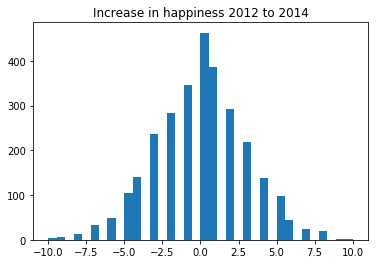

In [144]:
trust2012 = pd.DataFrame(raw_data.loc[raw_data.year == 6, ['idno','ppltrst']])
trust2012.columns = ['id','trust2012']
Keep2012 = trust2012.duplicated(subset = 'id', keep='first') == False
trust2012 = trust2012[Keep2012]

trust2014 = raw_data.loc[raw_data.year == 7, ['idno','ppltrst']]
trust2014.columns = ['id','trust2014']
Keep2014 = trust2014.duplicated(subset = 'id', keep='first') == False
trust2014 = trust2014[Keep2014]

combined = pd.merge(trust2012, trust2014, on='id', how='inner', validate='one_to_one')
combined['increase'] = combined.trust2014 - combined.trust2012

plt.hist(combined.increase, bins='auto')
plt.title('Increase in happiness 2012 to 2014')

print('Mean Increase in Trust from 2012 to 2014: {}'.format(round(combined.increase.mean(),2)))
print(stats.ttest_1samp(combined.increase, popmean=0))
print('FINDING: No Significant Change in Trust from 2012 to 2014')

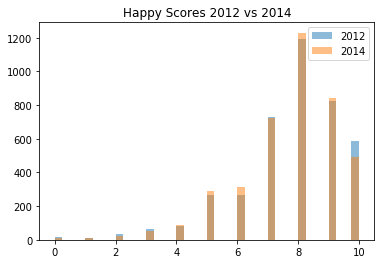

Mean Happiness 2012: 7.73
Mean Happiness 2014: 7.69
Ttest_indResult(statistic=1.2074597686358974, pvalue=0.2272901912283969)
FINDING:  No Significant Change in Happiness from 2012 to 2014


In [84]:
happy2012 = raw_data.loc[raw_data.year == 6, 'happy'].tolist()
happy2014 = raw_data.loc[raw_data.year == 7, 'happy'].tolist()
plt.hist(happy2012, alpha=.5, bins='auto', label='2012')
plt.hist(happy2014, alpha=.5, bins='auto', label='2014')
plt.title('Happy Scores 2012 vs 2014')
plt.legend()
plt.show()
print('Mean Happiness 2012: {}'.format(round(np.mean(happy2012),2)))
print('Mean Happiness 2014: {}'.format(round(np.mean(happy2014),2)))
print(stats.ttest_ind(happy2012, happy2014))
print('FINDING:  No Significant Change in Happiness from 2012 to 2014')

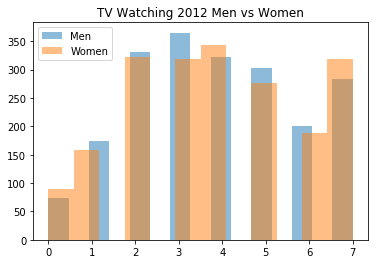

Mean TV Time Men: 3.86
Mean TV Time Women: 3.91
Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)
FINDING:  No Significant Difference in TV Time between Men and Women


In [83]:
tvmen = raw_data.loc[(raw_data.year == 6) & (raw_data.gndr == 1), 'tvtot'].tolist()
tvwomen = raw_data.loc[(raw_data.year == 6) & (raw_data.gndr == 2), 'tvtot'].tolist()
plt.hist(tvmen, alpha=.5, bins='auto', label='Men')
plt.hist(tvwomen, alpha=.5, bins='auto', label='Women')
plt.title('TV Watching 2012 Men vs Women')
plt.legend()
plt.show()
print('Mean TV Time Men: {}'.format(round(np.mean(tvmen),2)))
print('Mean TV Time Women: {}'.format(round(np.mean(tvwomen),2)))
print(stats.ttest_ind(tvmen, tvwomen))
print('FINDING:  No Significant Difference in TV Time between Men and Women')

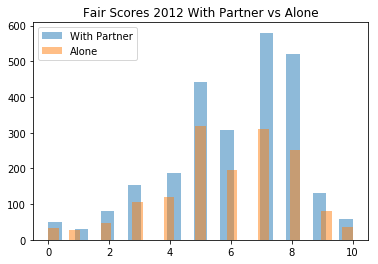

Mean Fair Score with Partner: 6.07
Mean Fair Score Alone: 5.87
Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)
FINDING:  Significant Difference


In [87]:
fairpartner = raw_data.loc[(raw_data.year == 6) & (raw_data.partner == 1), 'pplfair'].tolist()
fairalone = raw_data.loc[(raw_data.year == 6) & (raw_data.partner == 2), 'pplfair'].tolist()
plt.hist(fairpartner, alpha=.5, bins='auto', label='With Partner')
plt.hist(fairalone, alpha=.5, bins='auto', label='Alone')
plt.title('Fair Scores 2012 With Partner vs Alone')
plt.legend()
plt.show()
print('Mean Fair Score with Partner: {}'.format(round(np.mean(fairpartner),2)))
print('Mean Fair Score Alone: {}'.format(round(np.mean(fairalone),2)))
print(stats.ttest_ind(fairpartner, fairalone))
print('FINDING:  Significant Difference')

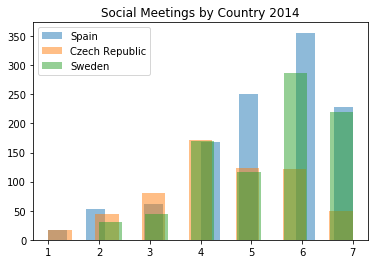

Mean Social Meetings Spain: 5.26
Mean Social Meetings Czech Republic: 4.5
Mean Social Meetings Sweden: 5.43
F_onewayResult(statistic=85.03811666631785, pvalue=1.67652480854007e-36)
FINDING:  Significant Difference


In [147]:
socialES = raw_data.loc[(raw_data.year == 7) & (raw_data.cntry == 'ES'), 'sclmeet'].tolist()
socialCZ = raw_data.loc[(raw_data.year == 7) & (raw_data.cntry == 'CZ'), 'sclmeet'].tolist()
socialSE = raw_data.loc[(raw_data.year == 7) & (raw_data.cntry == 'SE'), 'sclmeet'].tolist()
plt.hist(socialES, alpha=.5, bins='auto', label='Spain')
plt.hist(socialCZ, alpha=.5, bins='auto', label='Czech Republic')
plt.hist(socialSE, alpha=.5, bins='auto', label='Sweden')
plt.title('Social Meetings by Country 2014')
plt.legend()
plt.show()
print('Mean Social Meetings Spain: {}'.format(round(np.mean(socialES),2)))
print('Mean Social Meetings Czech Republic: {}'.format(round(np.mean(socialCZ),2)))
print('Mean Social Meetings Sweden: {}'.format(round(np.mean(socialSE),2)))
print(stats.f_oneway(socialES,socialCZ,socialSE))
print('FINDING:  Significant Difference')

In [179]:
raw_data['Age_Bracket'] = pd.qcut(raw_data.agea, 7, labels=['15-24','25-34','35-42',
                                                            '43-50','51-58','59-68',
                                                            '69-114'])



In [180]:
raw_data['Age_Bracket'].value_counts()

15-24     1259
59-68     1189
43-50     1181
35-42     1155
25-34     1145
51-58     1136
69-114    1082
Name: Age_Bracket, dtype: int64

In [177]:
def process_age_group(age_group):
    
    socialES = raw_data.loc[(raw_data.year == 7) & (raw_data.cntry == 'ES') & 
                        (raw_data.Age_Bracket == age_group), 'sclact'].tolist()
    socialCZ = raw_data.loc[(raw_data.year == 7) & (raw_data.cntry == 'CZ') & 
                        (raw_data.Age_Bracket == age_group), 'sclact'].tolist()
    socialSE = raw_data.loc[(raw_data.year == 7) & (raw_data.cntry == 'SE') & 
                        (raw_data.Age_Bracket == age_group), 'sclact'].tolist()
    plt.hist(socialES, alpha=.5, bins='auto', label='Spain')
    plt.hist(socialCZ, alpha=.5, bins='auto', label='Czech Republic')
    plt.hist(socialSE, alpha=.5, bins='auto', label='Sweden')
    plt.title('Social Activities by Country 2014 for Age Group: {}'.format(age_group))
    plt.legend()
    plt.show()
    print('Mean Social Meetings Spain: {}'.format(round(np.mean(socialES),2)))
    print('Mean Social Meetings Czech Republic: {}'.format(round(np.mean(socialCZ),2)))
    print('Mean Social Meetings Sweden: {}'.format(round(np.mean(socialSE),2)))
    print(stats.f_oneway(socialES,socialCZ,socialSE))
    print('FINDING:  Significant Difference')

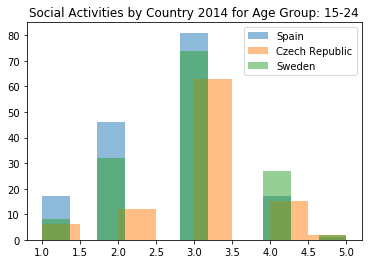

Mean Social Meetings Spain: 2.62
Mean Social Meetings Czech Republic: 2.95
Mean Social Meetings Sweden: 2.88
F_onewayResult(statistic=6.088349918411901, pvalue=0.002484910392816092)
FINDING:  Significant Difference


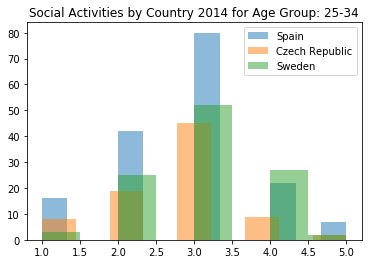

Mean Social Meetings Spain: 2.77
Mean Social Meetings Czech Republic: 2.73
Mean Social Meetings Sweden: 3.0
F_onewayResult(statistic=2.81374652256019, pvalue=0.06131450112795569)
FINDING:  Significant Difference


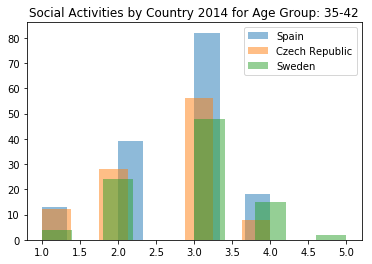

Mean Social Meetings Spain: 2.69
Mean Social Meetings Czech Republic: 2.58
Mean Social Meetings Sweden: 2.86
F_onewayResult(statistic=3.110445325019062, pvalue=0.04583011006918743)
FINDING:  Significant Difference


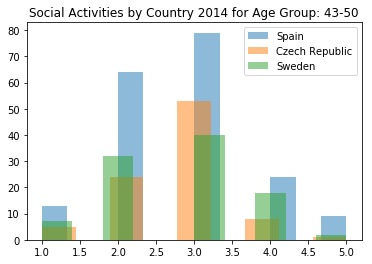

Mean Social Meetings Spain: 2.75
Mean Social Meetings Czech Republic: 2.74
Mean Social Meetings Sweden: 2.76
F_onewayResult(statistic=0.01389579245931781, pvalue=0.9862008148508695)
FINDING:  Significant Difference


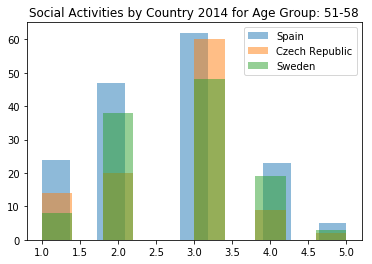

Mean Social Meetings Spain: 2.61
Mean Social Meetings Czech Republic: 2.67
Mean Social Meetings Sweden: 2.75
F_onewayResult(statistic=0.6924763991665116, pvalue=0.5009674052627499)
FINDING:  Significant Difference


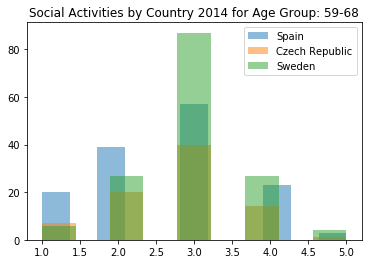

Mean Social Meetings Spain: 2.65
Mean Social Meetings Czech Republic: 2.78
Mean Social Meetings Sweden: 2.97
F_onewayResult(statistic=4.987457612623362, pvalue=0.007286282178064883)
FINDING:  Significant Difference


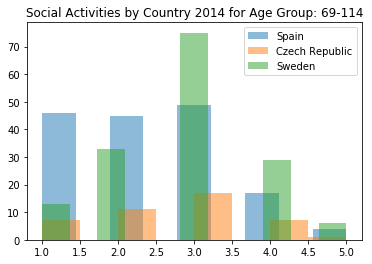

Mean Social Meetings Spain: 2.3
Mean Social Meetings Czech Republic: 2.63
Mean Social Meetings Sweden: 2.88
F_onewayResult(statistic=13.107094037362845, pvalue=3.213324249690072e-06)
FINDING:  Significant Difference


In [184]:
process_age_group('15-24')
process_age_group('25-34')
process_age_group('35-42')
process_age_group('43-50')
process_age_group('51-58')
process_age_group('59-68')
process_age_group('69-114')